# Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, matthews_corrcoef
from tqdm import tqdm

# Loading all datasets

In [4]:
dataset_test = pd.read_csv("Datasets/test.csv")
dataset_validation = pd.read_csv("Datasets/validation.csv")
dataset_train = pd.read_csv("Datasets/train.csv")
dataset_blue_amazon = pd.read_csv("Datasets/Blue_Amazon_QA_dataset.csv")
dataset_paq = pd.read_csv("Datasets/paq.csv")
squad_v1_pt_br_load_validation = load_dataset("squad_v1_pt", split = "validation")
dataset_paq_0_4500_questions = pd.read_csv("Datasets/paq_4500_en_questions.csv")
squad_en_load_validation = load_dataset("squad", split = "validation")


# Printing all datasets

In [5]:
dataset_test

,id_qa,corpus,question_en_origin,question_pt_origin,question_en_paraphase,question_pt_paraphase,answer_en_origin,answer_pt_origin,answer_en_validate,answer_pt_validate,abstract,eid_article_scopus,question_generic,answer_in_text,answer_difficulty,question_meaningful,answer_equivalent,question_type,abstract_translated_pt,pt_question_translated_to_en
0,B2083,2,What has enabled the discovery of new oil and ...,O que permitiu a descoberta de novas reservas ...,NaN,NaN,Technological advances,Avanço tecnológico,NaN,NaN,Advances in knowledge and capacity New explora...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Os adiantamentos no conhecimento e capacidade ...,What allowed the discovery of new coastal oil ...
1,B2392,2,Where will the main socioeconomic impacts of c...,Onde ocorrerão os principais impactos socioeco...,Changes in erosion and sedimentation will caus...,As mudanças na erosão e sedimentação causarão ...,At locations where erosion coincides with high...,Em locais onde a erosão coincide com alta dens...,Major socioeconomic impacts will occur at loca...,Os principais impactos socioeconômicos ocorrer...,Changes in impact Coastal erosion and changes ...,NaN,0.0,1.0,1.0,5.0,5.0,Where,Mudanças na erosão costeira de impacto e mudan...,Where will the main socioeconomic impacts occu...
2,B2327,2,How much more CO2 is being emited in 2019 comp...,Quanto CO2 a mais está sendo emitido em 2019 e...,What is the difference of CO2 emited between 2...,Qual a diferença entre a quantidade de CO2 emi...,2.9.,2.9.,2.9 gigatons,2.9 giga toneladas,Climate change Climate has always been a major...,NaN,0.0,1.0,1.0,5.0,5.0,How,O clima de mudança climática sempre foi uma gr...,How much more CO2 is being issued in 2019 comp...
3,B2471,2,approximately how many areas of the delta and ...,aproximadamente quantas áreas de delta e estuá...,Approximately how many large estuaries and del...,"Aproximadamente, quantos grandes estuários e d...",Approximately 450 delta and estuary areas bene...,Aproximadamente 450 área de deltas e estuários...,450,450,Cumulative impacts of human activities on mari...,NaN,0.0,1.0,4.0,4.0,4.0,None of the above,Impactos cumulativos das atividades humanas em...,Approximately how many delta and estuary areas...
4,B2522,2,In which sector most of the seafarer women work?,Em que setor trabalha a maioria das marinheiras?,In which sectors do most seafarer women work?,Em quais setores a maior parte das marinheiras...,Ferry and cruise-ship.,Balsa e cruzeiro.,ferry and cruise-ship,balsas e navios de cruzeiro,Distribution of ocean benefits and disbenefits...,NaN,0.0,1.0,1.0,5.0,5.0,None of the above,Distribuição de benefícios oceânicos e divulga...,In what industry does most sailors work?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,A1884,1,What does the full-azimuth towed-streamer seis...,O que o levantamento sísmico de cabo rebocado ...,NaN,NaN,It intends to provide high-quality information...,Ele pretende fornecer informações de alta qual...,It intends to explore pre-salt oil in Brazil.,Pretende explorar petróleo pré-sal no Brasil.,With a string of recent discoveries in the pre...,2-s2.0-85051649253,0.0,1.0,4.0,1.0,1.0,What,Com uma série de descobertas recentes nas área...,What is the seismic survey of azimute full azi...
223,A783,1,How come the rock salt guarantees excellent im...,Por que o sal grosso garante uma impermeabilid...,Why does rock salt have excellent impermeabili...,Por que o sal grosso tem excelente impermeabil...,Because the rock salt contains negligible poro...,Porque o sal grosso possui uma porosidade insi...,The rock salt has negligible porosity when com...,O sal grosso tem porosidade insignificante qua...,With the application of new technologies for p...,2-s2.0-84856741449,0.0,1.0,2.0,5.0,5.0,How,Com a aplicação de novas tecnologias para proc...,Why does the coarse salt guarantee an excellen...
224,A408,1,Why is Petrobras studying the strategy and tec...,Por que a Petrobras está estudando a es

In [6]:
dataset_train

,id_qa,corpus,question_en_origin,question_pt_origin,question_en_paraphase,question_pt_paraphase,answer_en_origin,answer_pt_origin,answer_en_validate,answer_pt_validate,abstract,eid_article_scopus,question_generic,answer_in_text,answer_difficulty,question_meaningful,answer_equivalent,question_type,abstract_translated_pt,pt_question_translated_to_en
0,A160,1,What method can be used to estimate air–sea se...,Qual método pode ser usado para estimar os flu...,To estimate sensitive air-sea sensible and lat...,Para estimar fluxos ar-mar de calor sensíveis ...,The turbulent covariance method.,O método de covariância turbulenta.,The eddy covariance (EC) method.,O método da covariância turbulenta (EC).,Turbulent air-sea heat fluxes were computed fr...,2-s2.0-85092110011,1.0,1.0,1.0,5.0,5.0,What,Os fluxos de calor do ar turbulento foram calc...,Which method can be used to estimate sensitive...
1,B2252,2,Why is mercury considered one of the ten most ...,Porque o mercúrio é considerado uma das dez su...,What's the reason mercury is considered one of...,Por quais motivos o mercurio é considerado uma...,"Because in humans, exposure can be harmful to ...","Pois em humanos, a exposição pode ser prejudic...",Because the principal form of mercury to which...,Porque a principal forma de mercúrio ao qual o...,Human health can be affected by many aspects o...,NaN,0.0,1.0,4.0,4.0,4.0,Why,A saúde humana pode ser afetada por muitos asp...,Why is mercury considered one of the ten most ...
2,B2044,2,What are the biological benefits of marine hyd...,Quais são os benefícios biológicos de hidratos...,NaN,NaN,Marine hydrates with seeping gas are high biod...,Hidratos marinhos com escape de gás são ambien...,Rich level of biodiversity supported by chemos...,Rico nível de biodiversidade sustentado por ba...,Marine hydrates (mainly methane hydrates) exis...,NaN,0.0,1.0,4.0,3.0,4.0,What,Os hidratos marinhos (principalmente hidratos ...,What are the biological benefits of marine hyd...
3,A931,1,What is the most productive oil province in Br...,Qual é a província petrolífera mais produtiva ...,NaN,NaN,The Campos basin,A bacia de Campos,The Campos basin,A bacia de Campos,"In 1939, the Lobito oil field, Brazil's first,...",2-s2.0-24769642,0.0,1.0,1.0,5.0,5.0,What,"Em 1939, o campo de óleo de Lobito, o primeiro...",What is the most productive oil province in Br...
4,B2045,2,What is the importance of the cultural practic...,Qual a importância das práticas culturais rela...,What is the trade-off of cultural practices re...,Qual o retorno das práticas culturais relacion...,They are essential to the maintenance and crea...,Elas são essenciais para a manutenção e criaçã...,They form essential parts of traditional foodw...,Formam partes essenciais das práticas alimenta...,Cultural services and other social benefits of...,NaN,0.0,1.0,3.0,5.0,4.0,What,Serviços culturais e outros benefícios sociais...,How important is cultural practices related to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,B1995,2,What is the proportion of women among the seaf...,Qual a proporção de mulheres entre os marinhei...,What is the percentage of womans in seafarers?,Qual porcentagem de mulheres é marinheira?,Worldwide aproximatly two per cent of the seaf...,A proporção é de aproximadamente de dois por c...,About two per cent.,Aproximadamente dois por cento.,Distribution of ocean benefits and disbenefits...,NaN,1.0,1.0,1.0,4.0,5.0,What,Distribuição de benefícios oceânicos e divulga...,What is the proportion of women between sailors?
1802,A1344,1,Increased arsenic levels on the coastal enviro...,Níveis acentuados de arsênico no ambiente cost...,Which South American countries had high levels...,Quais países sul-americanos tinham níveis elev...,"Brazil, Chile, Colombia and Argentina.","Brasil, Chile, Colômbia e Argentina.","Brazil, Chile, Colombia, Argentina","Brasil, Chile, Colômbia, Argentina","High concentrations of total arsenic (As), eve...",2-s2.0-8

In [7]:
dataset_validation

,id_qa,corpus,question_en_origin,question_pt_origin,question_en_paraphase,question_pt_paraphase,answer_en_origin,answer_pt_origin,answer_en_validate,answer_pt_validate,abstract,eid_article_scopus,question_generic,answer_in_text,answer_difficulty,question_meaningful,answer_equivalent,question_type,abstract_translated_pt,pt_question_translated_to_en
0,A1234,1,What are the methods of forecasting precipitat...,Quais são os métodos de previsão de precipitaç...,By which ways can the forecasting of precipita...,De que formas a previsão de precipitação no No...,1) teleconnections with cyclonic activity in t...,1) teleconexões com atividade ciclônica na reg...,teleconnections with cyclonic activity in the ...,teleconexões com atividade ciclônica na região...,Spatial distributions of percent of normal mon...,2-s2.0-20220489,0.0,1.0,2.0,5.0,5.0,What,Distribuições espaciais de porcentagem da prec...,What are the precipitation forecasting methods...
1,B2429,2,What is an impact of excess nutrients in marin...,Qual é o impacto do excesso de nutrientes nos ...,NaN,NaN,"They can cause algal blooms, which can generat...","Eles podem causar proliferação de algas, que p...",Excess nutrients can generate toxins that can ...,O excesso de nutrientes pode gerar toxinas que...,Increasing inputs of harmful material Eutrophi...,NaN,0.0,1.0,3.0,5.0,2.0,What,Aumentar os insumos de eutrofização de eutrofi...,What is the impact of excess nutrients in mari...
2,A969,1,When did the concern of political regulation o...,Quando começou a preocupação com as regulações...,When did the Brazilian government become inter...,Quando que o governo brasileirocpassou a terin...,In the 1970s.,Na década de 1970.,in the 1970s,na década de 70,The establishment of policies relevant to the ...,2-s2.0-85006339618,1.0,1.0,1.0,5.0,5.0,When,O estabelecimento de políticas relevantes para...,When did the concern began with the regulation...
3,A1330,1,How was the implementation model of the case s...,Como foi o modelo de implementação do estudo d...,How was the implementation of the case study d...,Como se deu a implementação do estudo de caso ...,The study involved the implementation of a mod...,O estudo envolveu a implementação de um modelo...,The model estimates the risk of losing ecosyst...,O modelo estima o risco de perda de serviços e...,The effects of the global climate change on oc...,2-s2.0-85039546750,0.0,1.0,3.0,5.0,5.0,How,Os efeitos da mudança climática global em ocea...,How was the model of implementation of the cas...
4,A1371,1,What is the results of the drought in Eastern ...,Quais são os resultados da seca no Brasil orie...,NaN,NaN,The drought resulted in a decrease of estuarin...,A seca resultou em uma diminuição do tamanho m...,It results in a decrease of estuarine mean sed...,Resulta na diminuição do tamanho médio de part...,Climate change will increase the frequency and...,2-s2.0-85075879935,0.0,1.0,3.0,5.0,5.0,What,A mudança climática aumentará a frequência e a...,What are the results of the drought in Eastern...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,A920,1,What fields in the Campos basin are located in...,Quais campos da bacia de Campos estão localiza...,Name the deep waters fields located in the Cam...,Cite os campos de águas profundas localizados ...,Albacora and Marlim,Albacora e Marlim,Albacora and Marlim giants fields.,Campos gigantes de Albacora e Marlim.,As a solution for sand production problems ass...,2-s2.0-85059218520,0.0,1.0,2.0,5.0,5.0,What,Como uma solução para problemas de produção de...,What fields of the field basin are located in ...
221,A1243,1,The existence of oil deposits in Brazilian dee...,A existência de depósitos de petróleo em águas...,NaN,NaN,More capital and know-how.,Mais capital e conhecimento processual.,NaN,NaN,The energy sector has been global before globa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O setor de energia tem sido global antes da gl...,The existence of oil deposits in deep Brazili

In [8]:
dataset_blue_amazon

,#,Source,book/wikipedia,Passage,Question,Answer,Passagem,Questão,Resposta
0,1,Alcatrazes_Islands.txt,wikipedia,Alcatrazes possesses rich fauna and flora; by ...,How many birds live in the Alcatrazes islands?,Around 10000 birds.,Alcatrazes possui rica fauna e flora; Em dezem...,Quantas aves vivem nas ilhas de Alcatrazes?,Cerca de 10000 pássaros.
1,2,Alcatrazes_Islands.txt,wikipedia,The islands are believed to present their very...,What are the five slabs in Alcatrazes?,"Duplo, Singela, do Paredão, Farol and Negra",Acredita-se que as ilhas apresentem seu format...,Quais são as cinco lajes em Alcatrazes?,"Duplo, Singela, Paredão, Farol e Negra"
2,3,Recife_Port.txt,wikipedia,The port handles National and international cr...,is the recife port international?,yes,O porto lida com os cruzeiros nacionais e inte...,O Recife Port International?,sim
3,4,Campos_Basin.txt,wikipedia,Five tectonic stages have been identified in t...,How many tectonic stages have been identified ...,five,Cinco etapas tectônicas foram identificadas na...,Quantos estágios tectônicos foram identificado...,cinco
4,5,Port_of_Santos.txt,wikipedia,"Shaped by urban, economic and demographic deve...",What are the main exports that go through the ...,"The main exports are coffee, sugar, and soy.","Forma de desenvolvimento urbano, econômico e d...",Quais são as principais exportações que passam...,"As principais exportações são café, açúcar e s..."
...,...,...,...,...,...,...,...,...,...
395,396,Trindade_and_Martin_Vaz.txt,wikipedia,The Trindade and Martin Vaz Islands were disco...,Who discovered Trindade and Martin Vaz Islands?,The Trindade and Martin Vaz Islands were disco...,As Ilhas Trindade e Martin Vaz foram descobert...,Quem descobriu Trindade e Ilhas Martin Vaz?,As Ilhas Trindade e Martin Vaz foram descobert...
396,397,Alcatrazes_Islands.txt,wikipedia,The islands are believed to present their very...,How old are the Alcatrazes Islands in their cu...,2.5 million years,Acredita-se que as ilhas apresentem seu format...,Quantos anos são as ilhas de Alcatrazes em sua...,"2,5 milhões de anos"
397,398,coastal_fisheries_of_brazil_2.txt,book,Commercial fishing began to develop more inten...,What type of fishing did Portuguese and Spanis...,Sardine fishing.,A pesca comercial começou a se desenvolver mai...,Que tipo de pesca os migrantes português e esp...,Pesca de sardinha.
398,399,Trindade_and_Martin_Vaz.txt,wikipedia,The islands are situated some 2100 kilometres ...,What is the distance between Trindade and Mart...,2550 kilometres,As ilhas estão situadas cerca de 2100 quilômet...,Qual é a distância entre Trindade e Ilhas Mart...,2550 quilômetros


In [9]:
dataset_paq

,label,question,answer
0,0.0,Qual é o clima de Sorocaba Brasil?,tropical
1,2.0,quão alto é omagua na floresta amazônica,entre 80 e 400 m
2,0.0,onde é a temporada 3 da corrida incrível china,Rio de Janeiro
3,0.0,Quantos municípios estão no Pantanal,12
4,2.0,A litologia do aquífero do paraná consiste pri...,Sandstones altamente permeáveis
...,...,...,...
14380,1.0,Qual é o nome da baía que separa o Rio de Jane...,Baía de Guanabara
14381,0.0,Qual é o nome da agência de pesquisa agrícola ...,EMBRAPA.
14382,1.0,Que percentagem da população brasileira vive e...,Mais de 60%
14383,0.0,Em que país sul-americano é o complexo hidrelé...,Brasil


In [10]:
squad_v1_pt_br_load_validation

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 10570
})

# Datasets: train, validation and test

In [11]:
dataset_concat_inicial = pd.concat([dataset_train, dataset_test, dataset_validation], ignore_index=True)
dataset_concat_inicial

,id_qa,corpus,question_en_origin,question_pt_origin,question_en_paraphase,question_pt_paraphase,answer_en_origin,answer_pt_origin,answer_en_validate,answer_pt_validate,abstract,eid_article_scopus,question_generic,answer_in_text,answer_difficulty,question_meaningful,answer_equivalent,question_type,abstract_translated_pt,pt_question_translated_to_en
0,A160,1,What method can be used to estimate air–sea se...,Qual método pode ser usado para estimar os flu...,To estimate sensitive air-sea sensible and lat...,Para estimar fluxos ar-mar de calor sensíveis ...,The turbulent covariance method.,O método de covariância turbulenta.,The eddy covariance (EC) method.,O método da covariância turbulenta (EC).,Turbulent air-sea heat fluxes were computed fr...,2-s2.0-85092110011,1.0,1.0,1.0,5.0,5.0,What,Os fluxos de calor do ar turbulento foram calc...,Which method can be used to estimate sensitive...
1,B2252,2,Why is mercury considered one of the ten most ...,Porque o mercúrio é considerado uma das dez su...,What's the reason mercury is considered one of...,Por quais motivos o mercurio é considerado uma...,"Because in humans, exposure can be harmful to ...","Pois em humanos, a exposição pode ser prejudic...",Because the principal form of mercury to which...,Porque a principal forma de mercúrio ao qual o...,Human health can be affected by many aspects o...,NaN,0.0,1.0,4.0,4.0,4.0,Why,A saúde humana pode ser afetada por muitos asp...,Why is mercury considered one of the ten most ...
2,B2044,2,What are the biological benefits of marine hyd...,Quais são os benefícios biológicos de hidratos...,NaN,NaN,Marine hydrates with seeping gas are high biod...,Hidratos marinhos com escape de gás são ambien...,Rich level of biodiversity supported by chemos...,Rico nível de biodiversidade sustentado por ba...,Marine hydrates (mainly methane hydrates) exis...,NaN,0.0,1.0,4.0,3.0,4.0,What,Os hidratos marinhos (principalmente hidratos ...,What are the biological benefits of marine hyd...
3,A931,1,What is the most productive oil province in Br...,Qual é a província petrolífera mais produtiva ...,NaN,NaN,The Campos basin,A bacia de Campos,The Campos basin,A bacia de Campos,"In 1939, the Lobito oil field, Brazil's first,...",2-s2.0-24769642,0.0,1.0,1.0,5.0,5.0,What,"Em 1939, o campo de óleo de Lobito, o primeiro...",What is the most productive oil province in Br...
4,B2045,2,What is the importance of the cultural practic...,Qual a importância das práticas culturais rela...,What is the trade-off of cultural practices re...,Qual o retorno das práticas culturais relacion...,They are essential to the maintenance and crea...,Elas são essenciais para a manutenção e criaçã...,They form essential parts of traditional foodw...,Formam partes essenciais das práticas alimenta...,Cultural services and other social benefits of...,NaN,0.0,1.0,3.0,5.0,4.0,What,Serviços culturais e outros benefícios sociais...,How important is cultural practices related to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,A920,1,What fields in the Campos basin are located in...,Quais campos da bacia de Campos estão localiza...,Name the deep waters fields located in the Cam...,Cite os campos de águas profundas localizados ...,Albacora and Marlim,Albacora e Marlim,Albacora and Marlim giants fields.,Campos gigantes de Albacora e Marlim.,As a solution for sand production problems ass...,2-s2.0-85059218520,0.0,1.0,2.0,5.0,5.0,What,Como uma solução para problemas de produção de...,What fields of the field basin are located in ...
2254,A1243,1,The existence of oil deposits in Brazilian dee...,A existência de depósitos de petróleo em águas...,NaN,NaN,More capital and know-how.,Mais capital e conhecimento processual.,NaN,NaN,The energy sector has been global before globa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O setor de energia tem sido global antes da gl...,The existence of oil deposits in deep Brazilia...
2255,B2113,2,How are MSP helping us to be more sustainable ...,Como o

# Reformulating: question_pt_origin, PIRA

In [12]:
dataset_question_pt_br = dataset_concat_inicial[['question_pt_origin', 'answer_pt_origin', 'abstract_translated_pt']]
dataset_question_pt_br = dataset_question_pt_br.assign(source = 'pira', language = 'pt-br', label = 1)
dataset_question_pt_br = dataset_question_pt_br[['source', 'question_pt_origin', 'answer_pt_origin', 'abstract_translated_pt', 'language', 'label']]
dataset_question_pt_br.rename({'question_pt_origin': 'question'}, axis = 1, inplace = True)
dataset_question_pt_br.rename({'abstract_translated_pt': 'context'}, axis = 1, inplace = True)
dataset_question_pt_br.rename({'answer_pt_origin': 'answer'}, axis = 1, inplace = True)

dataset_question_pt_br

,source,question,answer,context,language,label
0,pira,Qual método pode ser usado para estimar os flu...,O método de covariância turbulenta.,Os fluxos de calor do ar turbulento foram calc...,pt-br,1
1,pira,Porque o mercúrio é considerado uma das dez su...,"Pois em humanos, a exposição pode ser prejudic...",A saúde humana pode ser afetada por muitos asp...,pt-br,1
2,pira,Quais são os benefícios biológicos de hidratos...,Hidratos marinhos com escape de gás são ambien...,Os hidratos marinhos (principalmente hidratos ...,pt-br,1
3,pira,Qual é a província petrolífera mais produtiva ...,A bacia de Campos,"Em 1939, o campo de óleo de Lobito, o primeiro...",pt-br,1
4,pira,Qual a importância das práticas culturais rela...,Elas são essenciais para a manutenção e criaçã...,Serviços culturais e outros benefícios sociais...,pt-br,1
...,...,...,...,...,...,...
2253,pira,Quais campos da bacia de Campos estão localiza...,Albacora e Marlim,Como uma solução para problemas de produção de...,pt-br,1
2254,pira,A existência de depósitos de petróleo em águas...,Mais capital e conhecimento processual.,O setor de energia tem sido global antes da gl...,pt-br,1
2255,pira,Como o MSP está nos ajudando a sermos mais sus...,Definindo algumas zonas ou sistemas de gerenci...,A crescente escala de atividades humanas e os ...,pt-br,1
2256,pira,Que fatos relacionados a problemas logísticos ...,A incapacidade do mercado global e da indústri...,O cenário offshore brasileiro requer soluções ...,pt-br,1


# Reformulating: dataset_parafrases_pt_br

In [13]:
dataset_parafrases_pt_br = dataset_concat_inicial[['question_pt_paraphase','answer_pt_validate', 'abstract_translated_pt']]
dataset_parafrases_pt_br = dataset_parafrases_pt_br.assign(source = 'pira', language = 'pt-br', label = 1)
dataset_parafrases_pt_br = dataset_parafrases_pt_br[['source', 'question_pt_paraphase', 'answer_pt_validate', 'abstract_translated_pt', 'language', 'label']]
dataset_parafrases_pt_br.dropna(subset = 'question_pt_paraphase', inplace  = True)
dataset_parafrases_pt_br.reset_index(drop = True, inplace = True)
dataset_parafrases_pt_br.rename({'question_pt_paraphase': 'question'}, axis = 1, inplace = True)
dataset_parafrases_pt_br.rename({'abstract_translated_pt': 'context'}, axis = 1, inplace = True)
dataset_parafrases_pt_br.rename({'answer_pt_validate': 'answer'}, axis = 1, inplace = True)

dataset_parafrases_pt_br

,source,question,answer,context,language,label
0,pira,Para estimar fluxos ar-mar de calor sensíveis ...,O método da covariância turbulenta (EC).,Os fluxos de calor do ar turbulento foram calc...,pt-br,1
1,pira,Por quais motivos o mercurio é considerado uma...,Porque a principal forma de mercúrio ao qual o...,A saúde humana pode ser afetada por muitos asp...,pt-br,1
2,pira,Qual o retorno das práticas culturais relacion...,Formam partes essenciais das práticas alimenta...,Serviços culturais e outros benefícios sociais...,pt-br,1
3,pira,O que pode descrever a porção inferior do Alto...,por uma sedimentação flúvio-aluvial com ampla ...,"Os principais aspectos tectônicos, estratigráf...",pt-br,1
4,pira,O que indica que a inversão tectônica é uma fa...,A consistência entre o campos de estresse atua...,"Em margens continentais passivas, a frágil rea...",pt-br,1
...,...,...,...,...,...,...
1960,pira,O que foi visto com os resultados experimentai...,"Em média, bom.",O sistema P50 é um sistema flutuante de armaze...,pt-br,1
1961,pira,Qual continente domina a produção de aquicultura?,Ásia,Espera-se que o maior crescimento da produção ...,pt-br,1
1962,pira,Qual tipo de substrato terrestre com partícula...,"Os solos mais desenvolvidos, distróficos e sat...",Ilhas oceânicas vulcânicas apresentam solos qu...,pt-br,1
1963,pira,Cite os campos de águas profundas localizados ...,Campos gigantes de Albacora e Marlim.,Como uma solução para problemas de produção de...,pt-br,1


In [14]:
dataset_concat_pira_pt_br = pd.concat([dataset_parafrases_pt_br, dataset_question_pt_br], ignore_index=True)
dataset_concat_pira_pt_br

,source,question,answer,context,language,label
0,pira,Para estimar fluxos ar-mar de calor sensíveis ...,O método da covariância turbulenta (EC).,Os fluxos de calor do ar turbulento foram calc...,pt-br,1
1,pira,Por quais motivos o mercurio é considerado uma...,Porque a principal forma de mercúrio ao qual o...,A saúde humana pode ser afetada por muitos asp...,pt-br,1
2,pira,Qual o retorno das práticas culturais relacion...,Formam partes essenciais das práticas alimenta...,Serviços culturais e outros benefícios sociais...,pt-br,1
3,pira,O que pode descrever a porção inferior do Alto...,por uma sedimentação flúvio-aluvial com ampla ...,"Os principais aspectos tectônicos, estratigráf...",pt-br,1
4,pira,O que indica que a inversão tectônica é uma fa...,A consistência entre o campos de estresse atua...,"Em margens continentais passivas, a frágil rea...",pt-br,1
...,...,...,...,...,...,...
4218,pira,Quais campos da bacia de Campos estão localiza...,Albacora e Marlim,Como uma solução para problemas de produção de...,pt-br,1
4219,pira,A existência de depósitos de petróleo em águas...,Mais capital e conhecimento processual.,O setor de energia tem sido global antes da gl...,pt-br,1
4220,pira,Como o MSP está nos ajudando a sermos mais sus...,Definindo algumas zonas ou sistemas de gerenci...,A crescente escala de atividades humanas e os ...,pt-br,1
4221,pira,Que fatos relacionados a problemas logísticos ...,A incapacidade do mercado global e da indústri...,O cenário offshore brasileiro requer soluções ...,pt-br,1


# Dataset question_en, PIRA

In [15]:
dataset_question_en = dataset_concat_inicial[['question_en_origin', 'answer_en_origin', 'abstract']]
dataset_question_en = dataset_question_en.assign(source = 'pira', language = 'en', label = 1)
dataset_question_en = dataset_question_en[['source', 'question_en_origin', 'answer_en_origin', 'abstract', 'language', 'label']]
dataset_question_en.rename({'question_en_origin': 'question'}, axis = 1, inplace = True)
dataset_question_en.rename({'abstract': 'context'}, axis = 1, inplace = True)
dataset_question_en.rename({'answer_en_origin': 'answer'}, axis = 1, inplace = True)

dataset_question_en

,source,question,answer,context,language,label
0,pira,What method can be used to estimate air–sea se...,The turbulent covariance method.,Turbulent air-sea heat fluxes were computed fr...,en,1
1,pira,Why is mercury considered one of the ten most ...,"Because in humans, exposure can be harmful to ...",Human health can be affected by many aspects o...,en,1
2,pira,What are the biological benefits of marine hyd...,Marine hydrates with seeping gas are high biod...,Marine hydrates (mainly methane hydrates) exis...,en,1
3,pira,What is the most productive oil province in Br...,The Campos basin,"In 1939, the Lobito oil field, Brazil's first,...",en,1
4,pira,What is the importance of the cultural practic...,They are essential to the maintenance and crea...,Cultural services and other social benefits of...,en,1
...,...,...,...,...,...,...
2253,pira,What fields in the Campos basin are located in...,Albacora and Marlim,As a solution for sand production problems ass...,en,1
2254,pira,The existence of oil deposits in Brazilian dee...,More capital and know-how.,The energy sector has been global before globa...,en,1
2255,pira,How are MSP helping us to be more sustainable ...,Defining some zoning plans or more complex man...,The growing scale of human activities and the ...,en,1
2256,pira,What facts related to logistics problems for m...,The global market and naval industry incapacit...,Brazilian offshore scenario requires innovativ...,en,1


# Dataset question_parafrases_en

In [16]:
dataset_parafrases_en = dataset_concat_inicial[['question_en_paraphase', 'answer_en_validate', 'abstract']]
dataset_parafrases_en = dataset_parafrases_en.assign(source = 'pira', language = 'en', label = 1)
dataset_parafrases_en = dataset_parafrases_en[['source', 'question_en_paraphase', 'answer_en_validate', 'abstract', 'language', 'label']]
dataset_parafrases_en.dropna(subset = 'question_en_paraphase', inplace  = True)
dataset_parafrases_en.reset_index(drop = True, inplace = True)
dataset_parafrases_en.rename({'question_en_paraphase': 'question'}, axis = 1, inplace = True)
dataset_parafrases_en.rename({'abstract': 'context'}, axis = 1, inplace = True)
dataset_parafrases_en.rename({'answer_en_validate': 'answer'}, axis = 1, inplace = True)
dataset_parafrases_en

,source,question,answer,context,language,label
0,pira,To estimate sensitive air-sea sensible and lat...,The eddy covariance (EC) method.,Turbulent air-sea heat fluxes were computed fr...,en,1
1,pira,What's the reason mercury is considered one of...,Because the principal form of mercury to which...,Human health can be affected by many aspects o...,en,1
2,pira,What is the trade-off of cultural practices re...,They form essential parts of traditional foodw...,Cultural services and other social benefits of...,en,1
3,pira,What can describe the Upper Aptian's lower por...,by a fluvio-alluvial sedimentation with a wide...,"The main tectonic, stratigraphic and sedimento...",en,1
4,pira,What indicates that the tectonic inversion is ...,The consistency between the present-day stress...,"In passive continental margins, the brittle re...",en,1
...,...,...,...,...,...,...
1960,pira,What was observed between numerical simulation...,Generally good.,The P50 system is a Floating Production Storag...,en,1
1961,pira,Which continent dominate the world aquaculture...,Asia,The major growth in aquatic production is expe...,en,1
1962,pira,Which type of terrestrial substrate with miner...,"The most developed, dystrophic and Al-saturate...",Volcanic oceanic islands host soils that may h...,en,1
1963,pira,Name the deep waters fields located in the Cam...,Albacora and Marlim giants fields.,As a solution for sand production problems ass...,en,1


In [17]:
dataset_concat_pira_en = pd.concat([dataset_parafrases_en, dataset_question_en], ignore_index=True)
dataset_concat_pira_en

,source,question,answer,context,language,label
0,pira,To estimate sensitive air-sea sensible and lat...,The eddy covariance (EC) method.,Turbulent air-sea heat fluxes were computed fr...,en,1
1,pira,What's the reason mercury is considered one of...,Because the principal form of mercury to which...,Human health can be affected by many aspects o...,en,1
2,pira,What is the trade-off of cultural practices re...,They form essential parts of traditional foodw...,Cultural services and other social benefits of...,en,1
3,pira,What can describe the Upper Aptian's lower por...,by a fluvio-alluvial sedimentation with a wide...,"The main tectonic, stratigraphic and sedimento...",en,1
4,pira,What indicates that the tectonic inversion is ...,The consistency between the present-day stress...,"In passive continental margins, the brittle re...",en,1
...,...,...,...,...,...,...
4218,pira,What fields in the Campos basin are located in...,Albacora and Marlim,As a solution for sand production problems ass...,en,1
4219,pira,The existence of oil deposits in Brazilian dee...,More capital and know-how.,The energy sector has been global before globa...,en,1
4220,pira,How are MSP helping us to be more sustainable ...,Defining some zoning plans or more complex man...,The growing scale of human activities and the ...,en,1
4221,pira,What facts related to logistics problems for m...,The global market and naval industry incapacit...,Brazilian offshore scenario requires innovativ...,en,1


# Concat on PIRA dataset

In [18]:
dataset_concat_pira = pd.concat([dataset_concat_pira_pt_br, dataset_concat_pira_en], ignore_index=True)
dataset_concat_pira

,source,question,answer,context,language,label
0,pira,Para estimar fluxos ar-mar de calor sensíveis ...,O método da covariância turbulenta (EC).,Os fluxos de calor do ar turbulento foram calc...,pt-br,1
1,pira,Por quais motivos o mercurio é considerado uma...,Porque a principal forma de mercúrio ao qual o...,A saúde humana pode ser afetada por muitos asp...,pt-br,1
2,pira,Qual o retorno das práticas culturais relacion...,Formam partes essenciais das práticas alimenta...,Serviços culturais e outros benefícios sociais...,pt-br,1
3,pira,O que pode descrever a porção inferior do Alto...,por uma sedimentação flúvio-aluvial com ampla ...,"Os principais aspectos tectônicos, estratigráf...",pt-br,1
4,pira,O que indica que a inversão tectônica é uma fa...,A consistência entre o campos de estresse atua...,"Em margens continentais passivas, a frágil rea...",pt-br,1
...,...,...,...,...,...,...
8441,pira,What fields in the Campos basin are located in...,Albacora and Marlim,As a solution for sand production problems ass...,en,1
8442,pira,The existence of oil deposits in Brazilian dee...,More capital and know-how.,The energy sector has been global before globa...,en,1
8443,pira,How are MSP helping us to be more sustainable ...,Defining some zoning plans or more complex man...,The growing scale of human activities and the ...,en,1
8444,pira,What facts related to logistics problems for m...,The global market and naval industry incapacit...,Brazilian offshore scenario requires innovativ...,en,1


# Dataset Blue_Amazon_QA

In [19]:
dataset_blue_amazon_pt_br = dataset_blue_amazon[['Questão', 'Passagem', 'Resposta']]
dataset_blue_amazon_pt_br = dataset_blue_amazon_pt_br.assign(source = 'BlueAmazonQA', language = 'pt-br', label = 1)
dataset_blue_amazon_pt_br = dataset_blue_amazon_pt_br[['source', 'Questão', 'Resposta', 'Passagem', 'language', 'label']]
dataset_blue_amazon_pt_br.rename({'Questão': 'question'}, axis = 1, inplace = True)
dataset_blue_amazon_pt_br.rename({'Passagem': 'context'}, axis = 1, inplace = True)
dataset_blue_amazon_pt_br.rename({'Resposta': 'answer'}, axis = 1, inplace = True)
dataset_blue_amazon_pt_br

,source,question,answer,context,language,label
0,BlueAmazonQA,Quantas aves vivem nas ilhas de Alcatrazes?,Cerca de 10000 pássaros.,Alcatrazes possui rica fauna e flora; Em dezem...,pt-br,1
1,BlueAmazonQA,Quais são as cinco lajes em Alcatrazes?,"Duplo, Singela, Paredão, Farol e Negra",Acredita-se que as ilhas apresentem seu format...,pt-br,1
2,BlueAmazonQA,O Recife Port International?,sim,O porto lida com os cruzeiros nacionais e inte...,pt-br,1
3,BlueAmazonQA,Quantos estágios tectônicos foram identificado...,cinco,Cinco etapas tectônicas foram identificadas na...,pt-br,1
4,BlueAmazonQA,Quais são as principais exportações que passam...,"As principais exportações são café, açúcar e s...","Forma de desenvolvimento urbano, econômico e d...",pt-br,1
...,...,...,...,...,...,...
395,BlueAmazonQA,Quem descobriu Trindade e Ilhas Martin Vaz?,As Ilhas Trindade e Martin Vaz foram descobert...,As Ilhas Trindade e Martin Vaz foram descobert...,pt-br,1
396,BlueAmazonQA,Quantos anos são as ilhas de Alcatrazes em sua...,"2,5 milhões de anos",Acredita-se que as ilhas apresentem seu format...,pt-br,1
397,BlueAmazonQA,Que tipo de pesca os migrantes português e esp...,Pesca de sardinha.,A pesca comercial começou a se desenvolver mai...,pt-br,1
398,BlueAmazonQA,Qual é a distância entre Trindade e Ilhas Mart...,2550 quilômetros,As ilhas estão situadas cerca de 2100 quilômet...,pt-br,1


In [20]:
dataset_blue_amazon_en = dataset_blue_amazon[['Question', 'Passage', 'Answer']]
dataset_blue_amazon_en = dataset_blue_amazon_en.assign(source = 'BlueAmazonQA', language = 'en', label = 1)
dataset_blue_amazon_en = dataset_blue_amazon_en[['source', 'Question', 'Answer', 'Passage', 'language', 'label']]
dataset_blue_amazon_en.rename({'Question': 'question'}, axis = 1, inplace = True)
dataset_blue_amazon_en.rename({'Passage': 'context'}, axis = 1, inplace = True)
dataset_blue_amazon_en.rename({'Answer': 'answer'}, axis = 1, inplace = True)
dataset_blue_amazon_en

,source,question,answer,context,language,label
0,BlueAmazonQA,How many birds live in the Alcatrazes islands?,Around 10000 birds.,Alcatrazes possesses rich fauna and flora; by ...,en,1
1,BlueAmazonQA,What are the five slabs in Alcatrazes?,"Duplo, Singela, do Paredão, Farol and Negra",The islands are believed to present their very...,en,1
2,BlueAmazonQA,is the recife port international?,yes,The port handles National and international cr...,en,1
3,BlueAmazonQA,How many tectonic stages have been identified ...,five,Five tectonic stages have been identified in t...,en,1
4,BlueAmazonQA,What are the main exports that go through the ...,"The main exports are coffee, sugar, and soy.","Shaped by urban, economic and demographic deve...",en,1
...,...,...,...,...,...,...
395,BlueAmazonQA,Who discovered Trindade and Martin Vaz Islands?,The Trindade and Martin Vaz Islands were disco...,The Trindade and Martin Vaz Islands were disco...,en,1
396,BlueAmazonQA,How old are the Alcatrazes Islands in their cu...,2.5 million years,The islands are believed to present their very...,en,1
397,BlueAmazonQA,What type of fishing did Portuguese and Spanis...,Sardine fishing.,Commercial fishing began to develop more inten...,en,1
398,BlueAmazonQA,What is the distance between Trindade and Mart...,2550 kilometres,The islands are situated some 2100 kilometres ...,en,1


In [21]:
dataset_concat_blue_amazon = pd.concat([dataset_blue_amazon_pt_br, dataset_blue_amazon_en], ignore_index=True)
dataset_concat_blue_amazon

,source,question,answer,context,language,label
0,BlueAmazonQA,Quantas aves vivem nas ilhas de Alcatrazes?,Cerca de 10000 pássaros.,Alcatrazes possui rica fauna e flora; Em dezem...,pt-br,1
1,BlueAmazonQA,Quais são as cinco lajes em Alcatrazes?,"Duplo, Singela, Paredão, Farol e Negra",Acredita-se que as ilhas apresentem seu format...,pt-br,1
2,BlueAmazonQA,O Recife Port International?,sim,O porto lida com os cruzeiros nacionais e inte...,pt-br,1
3,BlueAmazonQA,Quantos estágios tectônicos foram identificado...,cinco,Cinco etapas tectônicas foram identificadas na...,pt-br,1
4,BlueAmazonQA,Quais são as principais exportações que passam...,"As principais exportações são café, açúcar e s...","Forma de desenvolvimento urbano, econômico e d...",pt-br,1
...,...,...,...,...,...,...
795,BlueAmazonQA,Who discovered Trindade and Martin Vaz Islands?,The Trindade and Martin Vaz Islands were disco...,The Trindade and Martin Vaz Islands were disco...,en,1
796,BlueAmazonQA,How old are the Alcatrazes Islands in their cu...,2.5 million years,The islands are believed to present their very...,en,1
797,BlueAmazonQA,What type of fishing did Portuguese and Spanis...,Sardine fishing.,Commercial fishing began to develop more inten...,en,1
798,BlueAmazonQA,What is the distance between Trindade and Mart...,2550 kilometres,The islands are situated some 2100 kilometres ...,en,1


In [22]:
dataset_concat_pira_blue_amazon = pd.concat([dataset_concat_pira, dataset_concat_blue_amazon], ignore_index=True)
dataset_concat_pira_blue_amazon

,source,question,answer,context,language,label
0,pira,Para estimar fluxos ar-mar de calor sensíveis ...,O método da covariância turbulenta (EC).,Os fluxos de calor do ar turbulento foram calc...,pt-br,1
1,pira,Por quais motivos o mercurio é considerado uma...,Porque a principal forma de mercúrio ao qual o...,A saúde humana pode ser afetada por muitos asp...,pt-br,1
2,pira,Qual o retorno das práticas culturais relacion...,Formam partes essenciais das práticas alimenta...,Serviços culturais e outros benefícios sociais...,pt-br,1
3,pira,O que pode descrever a porção inferior do Alto...,por uma sedimentação flúvio-aluvial com ampla ...,"Os principais aspectos tectônicos, estratigráf...",pt-br,1
4,pira,O que indica que a inversão tectônica é uma fa...,A consistência entre o campos de estresse atua...,"Em margens continentais passivas, a frágil rea...",pt-br,1
...,...,...,...,...,...,...
9241,BlueAmazonQA,Who discovered Trindade and Martin Vaz Islands?,The Trindade and Martin Vaz Islands were disco...,The Trindade and Martin Vaz Islands were disco...,en,1
9242,BlueAmazonQA,How old are the Alcatrazes Islands in their cu...,2.5 million years,The islands are believed to present their very...,en,1
9243,BlueAmazonQA,What type of fishing did Portuguese and Spanis...,Sardine fishing.,Commercial fishing began to develop more inten...,en,1
9244,BlueAmazonQA,What is the distance between Trindade and Mart...,2550 kilometres,The islands are situated some 2100 kilometres ...,en,1


# Dataset PAQ

In [23]:
dataset_paq = dataset_paq.assign(source = 'PAQ', language = 'pt-br', context = 'no context')
dataset_paq = dataset_paq[['source', 'question', 'answer', 'context', 'language', 'label']]
dataset_paq

,source,question,answer,context,language,label
0,PAQ,Qual é o clima de Sorocaba Brasil?,tropical,no context,pt-br,0.0
1,PAQ,quão alto é omagua na floresta amazônica,entre 80 e 400 m,no context,pt-br,2.0
2,PAQ,onde é a temporada 3 da corrida incrível china,Rio de Janeiro,no context,pt-br,0.0
3,PAQ,Quantos municípios estão no Pantanal,12,no context,pt-br,0.0
4,PAQ,A litologia do aquífero do paraná consiste pri...,Sandstones altamente permeáveis,no context,pt-br,2.0
...,...,...,...,...,...,...
14380,PAQ,Qual é o nome da baía que separa o Rio de Jane...,Baía de Guanabara,no context,pt-br,1.0
14381,PAQ,Qual é o nome da agência de pesquisa agrícola ...,EMBRAPA.,no context,pt-br,0.0
14382,PAQ,Que percentagem da população brasileira vive e...,Mais de 60%,no context,pt-br,1.0
14383,PAQ,Em que país sul-americano é o complexo hidrelé...,Brasil,no context,pt-br,0.0


# Separating in datasets with label == 0, label == 1, label == 2

In [24]:
dataset_paq_0 = dataset_paq.loc[dataset_paq['label'] == 0]
dataset_paq_1 = dataset_paq.loc[dataset_paq['label'] == 1]
dataset_paq_2 = dataset_paq.loc[dataset_paq['label'] == 2]
dataset_paq_3 = dataset_paq.loc[dataset_paq['label'] == 3]

In [25]:
dataset_paq_1

,source,question,answer,context,language,label
12,PAQ,Quem descobriu Fernando de Noronha,Expedição Gonçalo Coelho.,no context,pt-br,1.0
15,PAQ,quantas regiões da Bahia estão lá do rio Parag...,dois,no context,pt-br,1.0
30,PAQ,A ponte do rio Oyapock é a primeira travessia ...,Brasil,no context,pt-br,1.0
34,PAQ,a baía de todos os santos no Brasil está conec...,oceano Atlântico,no context,pt-br,1.0
61,PAQ,que metal está sendo importado para o país ama...,mercúrio,no context,pt-br,1.0
...,...,...,...,...,...,...
14361,PAQ,Porto do Itaqui está em que rio no Brasil,Rio Grande do Sul,no context,pt-br,1.0
14368,PAQ,Quais são as praias do Rio Grande do Norte,Ponta Negra,no context,pt-br,1.0
14371,PAQ,Qual é o nome da corrente de água quente que f...,O Brasil atual,no context,pt-br,1.0
14380,PAQ,Qual é o nome da baía que separa o Rio de Jane...,Baía de Guanabara,no context,pt-br,1.0


#  Concat ALL

In [26]:
dataset_concat_pira_blue_amazon_paq = pd.concat([dataset_concat_pira, dataset_concat_blue_amazon, dataset_paq_1], ignore_index=True)
dataset_concat_pira_blue_amazon_paq

,source,question,answer,context,language,label
0,pira,Para estimar fluxos ar-mar de calor sensíveis ...,O método da covariância turbulenta (EC).,Os fluxos de calor do ar turbulento foram calc...,pt-br,1.0
1,pira,Por quais motivos o mercurio é considerado uma...,Porque a principal forma de mercúrio ao qual o...,A saúde humana pode ser afetada por muitos asp...,pt-br,1.0
2,pira,Qual o retorno das práticas culturais relacion...,Formam partes essenciais das práticas alimenta...,Serviços culturais e outros benefícios sociais...,pt-br,1.0
3,pira,O que pode descrever a porção inferior do Alto...,por uma sedimentação flúvio-aluvial com ampla ...,"Os principais aspectos tectônicos, estratigráf...",pt-br,1.0
4,pira,O que indica que a inversão tectônica é uma fa...,A consistência entre o campos de estresse atua...,"Em margens continentais passivas, a frágil rea...",pt-br,1.0
...,...,...,...,...,...,...
10782,PAQ,Porto do Itaqui está em que rio no Brasil,Rio Grande do Sul,no context,pt-br,1.0
10783,PAQ,Quais são as praias do Rio Grande do Norte,Ponta Negra,no context,pt-br,1.0
10784,PAQ,Qual é o nome da corrente de água quente que f...,O Brasil atual,no context,pt-br,1.0
10785,PAQ,Qual é o nome da baía que separa o Rio de Jane...,Baía de Guanabara,no context,pt-br,1.0


In [27]:
dataset_concat_pira_blue_amazon_paq_pt_br = pd.concat([dataset_concat_pira_pt_br, dataset_blue_amazon_pt_br, dataset_paq_1], ignore_index=True)
dataset_concat_pira_blue_amazon_paq_pt_br

,source,question,answer,context,language,label
0,pira,Para estimar fluxos ar-mar de calor sensíveis ...,O método da covariância turbulenta (EC).,Os fluxos de calor do ar turbulento foram calc...,pt-br,1.0
1,pira,Por quais motivos o mercurio é considerado uma...,Porque a principal forma de mercúrio ao qual o...,A saúde humana pode ser afetada por muitos asp...,pt-br,1.0
2,pira,Qual o retorno das práticas culturais relacion...,Formam partes essenciais das práticas alimenta...,Serviços culturais e outros benefícios sociais...,pt-br,1.0
3,pira,O que pode descrever a porção inferior do Alto...,por uma sedimentação flúvio-aluvial com ampla ...,"Os principais aspectos tectônicos, estratigráf...",pt-br,1.0
4,pira,O que indica que a inversão tectônica é uma fa...,A consistência entre o campos de estresse atua...,"Em margens continentais passivas, a frágil rea...",pt-br,1.0
...,...,...,...,...,...,...
6159,PAQ,Porto do Itaqui está em que rio no Brasil,Rio Grande do Sul,no context,pt-br,1.0
6160,PAQ,Quais são as praias do Rio Grande do Norte,Ponta Negra,no context,pt-br,1.0
6161,PAQ,Qual é o nome da corrente de água quente que f...,O Brasil atual,no context,pt-br,1.0
6162,PAQ,Qual é o nome da baía que separa o Rio de Jane...,Baía de Guanabara,no context,pt-br,1.0


In [28]:
dataset_concat_pira_blue_amazon_paq_en = pd.concat([dataset_concat_pira_en, dataset_blue_amazon_en], ignore_index=True)
dataset_concat_pira_blue_amazon_paq_en

,source,question,answer,context,language,label
0,pira,To estimate sensitive air-sea sensible and lat...,The eddy covariance (EC) method.,Turbulent air-sea heat fluxes were computed fr...,en,1
1,pira,What's the reason mercury is considered one of...,Because the principal form of mercury to which...,Human health can be affected by many aspects o...,en,1
2,pira,What is the trade-off of cultural practices re...,They form essential parts of traditional foodw...,Cultural services and other social benefits of...,en,1
3,pira,What can describe the Upper Aptian's lower por...,by a fluvio-alluvial sedimentation with a wide...,"The main tectonic, stratigraphic and sedimento...",en,1
4,pira,What indicates that the tectonic inversion is ...,The consistency between the present-day stress...,"In passive continental margins, the brittle re...",en,1
...,...,...,...,...,...,...
4618,BlueAmazonQA,Who discovered Trindade and Martin Vaz Islands?,The Trindade and Martin Vaz Islands were disco...,The Trindade and Martin Vaz Islands were disco...,en,1
4619,BlueAmazonQA,How old are the Alcatrazes Islands in their cu...,2.5 million years,The islands are believed to present their very...,en,1
4620,BlueAmazonQA,What type of fishing did Portuguese and Spanis...,Sardine fishing.,Commercial fishing began to develop more inten...,en,1
4621,BlueAmazonQA,What is the distance between Trindade and Mart...,2550 kilometres,The islands are situated some 2100 kilometres ...,en,1


# Dividing in "train", "test" and "validation"

# Getting 6000 questions from paq with label == 0

In [29]:
dataset_paq_0_6000 = dataset_paq_0.head(6000)
dataset_paq_0_6000

,source,question,answer,context,language,label
0,PAQ,Qual é o clima de Sorocaba Brasil?,tropical,no context,pt-br,0.0
2,PAQ,onde é a temporada 3 da corrida incrível china,Rio de Janeiro,no context,pt-br,0.0
3,PAQ,Quantos municípios estão no Pantanal,12,no context,pt-br,0.0
5,PAQ,Onde fica o Sunsás ORogor encontrado na Améric...,Craton amazônio.,no context,pt-br,0.0
6,PAQ,Em que país é o Parque Indígena do Xingu,Brasil,no context,pt-br,0.0
...,...,...,...,...,...,...
6800,PAQ,Em qual cidade é TeleMEZONAS a maior antena au...,Guayaquil.,no context,pt-br,0.0
6801,PAQ,O que Vinicius representa no mascote olímpico?,Vida selvagem brasileira,no context,pt-br,0.0
6802,PAQ,Qual país possui a maior usina hidrelétrica na...,Brasil,no context,pt-br,0.0
6803,PAQ,Em que país foi a expedição Roosevelt para exp...,Brasil,no context,pt-br,0.0


# Getting 3000 questions from "squad_v1_pt_br" dataset in Hugging Face

In [30]:
squad_v1_pt_br_validation = pd.DataFrame(squad_v1_pt_br_load_validation)
squad_v1_pt_br_validation

,id,title,context,question,answers
0,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 foi um jogo de futebol americano...,Qual time da NFL representou o AFC no Super Bo...,"{'text': ['Denver Broncos', 'Denver Broncos', ..."
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 foi um jogo de futebol americano...,Qual time da NFL representou o NFC no Super Bo...,"{'text': ['Carolina Panthers', 'Carolina Panth..."
2,56be4db0acb8001400a502ee,Super_Bowl_50,Super Bowl 50 foi um jogo de futebol americano...,Onde aconteceu o Super Bowl 50?,"{'text': ['Santa Clara, Califórnia', 'Estádio ..."
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 foi um jogo de futebol americano...,Qual time da NFL venceu o Super Bowl 50?,"{'text': ['Denver Broncos', 'Denver Broncos', ..."
4,56be4db0acb8001400a502f0,Super_Bowl_50,Super Bowl 50 foi um jogo de futebol americano...,Que cor foi usada para enfatizar o 50º anivers...,"{'text': ['ouro', 'ouro', 'ouro'], 'answer_sta..."
...,...,...,...,...,...
10565,5737aafd1c456719005744fb,Force,A força de libra tem uma contrapartida métrica...,Qual é o termo métrico menos usado que o Newton?,"{'text': ['quilograma-força', 'libra-força', '..."
10566,5737aafd1c456719005744fc,Force,A força de libra tem uma contrapartida métrica...,Qual é a força de quilograma às vezes referenc...,"{'text': ['kilopond', 'kilopond', 'kilopond', ..."
10567,5737aafd1c456719005744fd,Force,A força de libra tem uma contrapartida métrica...,O que é uma unidade de massa muito raramente u...,"{'text': ['lesma', 'lesma métrica', 'lesma mét..."
10568,5737aafd1c456719005744fe,Force,A força de libra tem uma contrapartida métrica...,O que raramente usava o termo de uma unidade d...,"{'text': ['galinha', 'galinha', 'galinha', 'ga..."


In [31]:
dataset_huggingface_3000 = squad_v1_pt_br_validation.sample(n = 3000, random_state = 7)
dataset_huggingface_3000 = dataset_huggingface_3000[['question', 'context', 'answers']]
dataset_huggingface_3000 = dataset_huggingface_3000.assign(source = 'squad_v1_pt', language = 'pt_br', label = 0)
dataset_huggingface_3000 = dataset_huggingface_3000[['source', 'question', 'answers', 'context', 'language', 'label']]
dataset_huggingface_3000.rename({'answers': 'answer'}, axis = 1, inplace = True)
dataset_huggingface_3000

,source,question,answer,context,language,label
5966,squad_v1_pt,Quais duas comédias foram apresentadas na nova...,"{'text': ['A família média e moderna', 'A famí...",Entre os poucos pontos brilhantes desta tempor...,pt_br,0
7886,squad_v1_pt,Que tipo de lentes foram necessárias para ver ...,"{'text': ['óculos com uma lente escurecida', '...","Em 1993, para o 30º aniversário da franquia, o...",pt_br,0
5182,squad_v1_pt,O que sofreu recentemente extensa restauração?,"{'text': ['Tyneside Classical', 'Tyneside Clas...",A cidade tem um extenso centro neoclássico con...,pt_br,0
8265,squad_v1_pt,Quando foi inventado o roteiro Phags-pa?,"{'text': ['1269', '1269', '1269'], 'answer_sta...","Desde a sua invenção em 1269, a escrita &#39;P...",pt_br,0
4281,squad_v1_pt,Que língua aceitou que o Tribunal de Justiça f...,"{'text': ['gaélico', 'gaélico', 'gaélico'], 'a...",Os artigos 1 a 7 da Regulamentação Livre Circu...,pt_br,0
...,...,...,...,...,...,...
7212,squad_v1_pt,A que horas é que a rivalidade Harvard-Yale é ...,"{'text': ['a cada dois anos, quando as equipes...",A Harvard Crimson compete em 42 esportes inter...,pt_br,0
1166,squad_v1_pt,Que monastério os monges de Saint-Evroul estab...,{'text': ['Mosteiro latino em Sant&#39;Eufemia...,"Em Saint Evroul, uma tradição de canto se dese...",pt_br,0
6813,squad_v1_pt,Os húngaros realizaram essa desobediência civi...,"{'text': ['Francis Deák', 'Francis Deák', 'Fra...",A desobediência civil não-revolucionária é uma...,pt_br,0
9789,squad_v1_pt,Quando o ISIL jurou lealdade à Al-Qaeda?,"{'text': ['2004', '2004', '2004'], 'answer_sta...","Originada como a al-Tawhid em Jihad em 1999, e...",pt_br,0


# Complete dataset pt_br

In [32]:
dataset_completo_pt_br = pd.concat([dataset_concat_pira_blue_amazon_paq_pt_br, dataset_paq_0_6000, dataset_huggingface_3000], ignore_index=True)
dataset_completo_pt_br.to_csv('dataset_pt_br.csv', index=False)
dataset_completo_pt_br

,source,question,answer,context,language,label
0,pira,Para estimar fluxos ar-mar de calor sensíveis ...,O método da covariância turbulenta (EC).,Os fluxos de calor do ar turbulento foram calc...,pt-br,1.0
1,pira,Por quais motivos o mercurio é considerado uma...,Porque a principal forma de mercúrio ao qual o...,A saúde humana pode ser afetada por muitos asp...,pt-br,1.0
2,pira,Qual o retorno das práticas culturais relacion...,Formam partes essenciais das práticas alimenta...,Serviços culturais e outros benefícios sociais...,pt-br,1.0
3,pira,O que pode descrever a porção inferior do Alto...,por uma sedimentação flúvio-aluvial com ampla ...,"Os principais aspectos tectônicos, estratigráf...",pt-br,1.0
4,pira,O que indica que a inversão tectônica é uma fa...,A consistência entre o campos de estresse atua...,"Em margens continentais passivas, a frágil rea...",pt-br,1.0
...,...,...,...,...,...,...
15159,squad_v1_pt,A que horas é que a rivalidade Harvard-Yale é ...,"{'text': ['a cada dois anos, quando as equipes...",A Harvard Crimson compete em 42 esportes inter...,pt_br,0.0
15160,squad_v1_pt,Que monastério os monges de Saint-Evroul estab...,{'text': ['Mosteiro latino em Sant&#39;Eufemia...,"Em Saint Evroul, uma tradição de canto se dese...",pt_br,0.0
15161,squad_v1_pt,Os húngaros realizaram essa desobediência civi...,"{'text': ['Francis Deák', 'Francis Deák', 'Fra...",A desobediência civil não-revolucionária é uma...,pt_br,0.0
15162,squad_v1_pt,Quando o ISIL jurou lealdade à Al-Qaeda?,"{'text': ['2004', '2004', '2004'], 'answer_sta...","Originada como a al-Tawhid em Jihad em 1999, e...",pt_br,0.0


# Translating PAQ questions from pt_br to english using chat gpt

## Getting 4500 questions from PAQ

In [33]:
dataset_paq_0_4500_questions = dataset_paq_0_4500_questions.assign(source = 'PAQ', language = 'en', label = 0, answer = 'no answer', context = 'no context')
dataset_paq_0_4500_questions = dataset_paq_0_4500_questions[['source', 'question', 'answer', 'context', 'language', 'label']]
dataset_paq_0_4500_questions

,source,question,answer,context,language,label
0,PAQ,What is the climate of Sorocaba Brazil?,no answer,no context,en,0
1,PAQ,Where is Season 3 of the incredible race China,no answer,no context,en,0
2,PAQ,How many municipalities are in the Pantanal,no answer,no context,en,0
3,PAQ,Where is the Sunsás Orogon found in South America,no answer,no context,en,0
4,PAQ,In which country is the Xingu Indigenous Park,no answer,no context,en,0
...,...,...,...,...,...,...
4447,PAQ,When did the Amazonian pop art movement started?,no answer,no context,en,0
4448,PAQ,Where Charlton Ogburn wrote Gold from the Sea ...,no answer,no context,en,0
4449,PAQ,Atlantic dried forests are part of which biome...,no answer,no context,en,0
4450,PAQ,What is an example of a user search that uses ...,no answer,no context,en,0


## Getting 2250 questions from squad_en

In [34]:
squad_en_validation = pd.DataFrame(squad_en_load_validation)
squad_en_validation

,id,title,context,question,answers
0,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the AFC at Super Bo...,"{'text': ['Denver Broncos', 'Denver Broncos', ..."
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,"{'text': ['Carolina Panthers', 'Carolina Panth..."
2,56be4db0acb8001400a502ee,Super_Bowl_50,Super Bowl 50 was an American football game to...,Where did Super Bowl 50 take place?,"{'text': ['Santa Clara, California', 'Levi's S..."
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,"{'text': ['Denver Broncos', 'Denver Broncos', ..."
4,56be4db0acb8001400a502f0,Super_Bowl_50,Super Bowl 50 was an American football game to...,What color was used to emphasize the 50th anni...,"{'text': ['gold', 'gold', 'gold'], 'answer_sta..."
...,...,...,...,...,...
10565,5737aafd1c456719005744fb,Force,"The pound-force has a metric counterpart, less...",What is the metric term less used than the New...,"{'text': ['kilogram-force', 'pound-force', 'ki..."
10566,5737aafd1c456719005744fc,Force,"The pound-force has a metric counterpart, less...",What is the kilogram-force sometimes reffered ...,"{'text': ['kilopond', 'kilopond', 'kilopond', ..."
10567,5737aafd1c456719005744fd,Force,"The pound-force has a metric counterpart, less...",What is a very seldom used unit of mass in the...,"{'text': ['slug', 'metric slug', 'metric slug'..."
10568,5737aafd1c456719005744fe,Force,"The pound-force has a metric counterpart, less...",What seldom used term of a unit of force equal...,"{'text': ['kip', 'kip', 'kip', 'kip', 'kip'], ..."


In [35]:
dataset_huggingface_2250 = squad_en_validation.sample(n = 2250, random_state = 7)
dataset_huggingface_2250 = dataset_huggingface_2250[['question', 'context', 'answers']]
dataset_huggingface_2250 = dataset_huggingface_2250.assign(source = 'squad_v1_pt', language = 'pt_br', label = 0)
dataset_huggingface_2250 = dataset_huggingface_2250[['source', 'question', 'answers', 'context', 'language', 'label']]
dataset_huggingface_2250.rename({'answers': 'answer'}, axis = 1, inplace = True)
dataset_huggingface_2250

,source,question,answer,context,language,label
5966,squad_v1_pt,What two comedies were featured on ABC's new W...,"{'text': ['The Middle and Modern Family', 'The...",Among the few bright spots during this season ...,pt_br,0
7886,squad_v1_pt,What type of lenses were needed to see the 3D ...,"{'text': ['glasses with one darkened lens', 'g...","In 1993, for the franchise's 30th anniversary,...",pt_br,0
5182,squad_v1_pt,What has recently undergone extensive restorat...,"{'text': ['Tyneside Classical', 'Tyneside Clas...",The city has an extensive neoclassical centre ...,pt_br,0
8265,squad_v1_pt,When was Phags-pa script invented?,"{'text': ['1269', '1269', '1269'], 'answer_sta...","Since its invention in 1269, the 'Phags-pa scr...",pt_br,0
4281,squad_v1_pt,What language did the Court of Justice accept ...,"{'text': ['Gaelic', 'Gaelic', 'Gaelic'], 'answ...",The Free Movement of Workers Regulation articl...,pt_br,0
...,...,...,...,...,...,...
7254,squad_v1_pt,Who mapped the St. Johns River in 1562?,"{'text': ['Jean Ribault', 'Jean Ribault', 'Jea...",French Huguenot explorer Jean Ribault charted ...,pt_br,0
7427,squad_v1_pt,What impact did the high school education move...,"{'text': ['increase', 'an increase', 'increase...",During the mass high school education movement...,pt_br,0
854,squad_v1_pt,What is the Saxon Garden in Polish?,"{'text': ['Ogród Saski', 'Ogród Saski', 'Ogród...","Nearby, in Ogród Saski (the Saxon Garden), the...",pt_br,0
1946,squad_v1_pt,How do co-teachers work with each other to ful...,"{'text': ['harmoniously', 'in sync', 'harmonio...",Co-teaching has also become a new trend amongs...,pt_br,0


# Complete dataset en

In [36]:
dataset_completo_en = pd.concat([dataset_concat_pira_blue_amazon_paq_en, dataset_paq_0_4500_questions, dataset_huggingface_2250], ignore_index=True)
dataset_completo_en.to_csv('dataset_en.csv', index=False)
dataset_completo_en

,source,question,answer,context,language,label
0,pira,To estimate sensitive air-sea sensible and lat...,The eddy covariance (EC) method.,Turbulent air-sea heat fluxes were computed fr...,en,1
1,pira,What's the reason mercury is considered one of...,Because the principal form of mercury to which...,Human health can be affected by many aspects o...,en,1
2,pira,What is the trade-off of cultural practices re...,They form essential parts of traditional foodw...,Cultural services and other social benefits of...,en,1
3,pira,What can describe the Upper Aptian's lower por...,by a fluvio-alluvial sedimentation with a wide...,"The main tectonic, stratigraphic and sedimento...",en,1
4,pira,What indicates that the tectonic inversion is ...,The consistency between the present-day stress...,"In passive continental margins, the brittle re...",en,1
...,...,...,...,...,...,...
11320,squad_v1_pt,Who mapped the St. Johns River in 1562?,"{'text': ['Jean Ribault', 'Jean Ribault', 'Jea...",French Huguenot explorer Jean Ribault charted ...,pt_br,0
11321,squad_v1_pt,What impact did the high school education move...,"{'text': ['increase', 'an increase', 'increase...",During the mass high school education movement...,pt_br,0
11322,squad_v1_pt,What is the Saxon Garden in Polish?,"{'text': ['Ogród Saski', 'Ogród Saski', 'Ogród...","Nearby, in Ogród Saski (the Saxon Garden), the...",pt_br,0
11323,squad_v1_pt,How do co-teachers work with each other to ful...,"{'text': ['harmoniously', 'in sync', 'harmonio...",Co-teaching has also become a new trend amongs...,pt_br,0


## Dividing in Train, validation and test for pt_br complete dataset

In [37]:
y_pt_br = dataset_completo_pt_br.loc[:,"label"]
X_pt_br = dataset_completo_pt_br.loc[:,"question"]

In [38]:
X_pt_br_train, X_pt_br_to_split, y_pt_br_train, y_pt_br_to_split = train_test_split(X_pt_br, y_pt_br, test_size=0.2, random_state=7, stratify=y_pt_br)

In [39]:
X_pt_br_validation, X_pt_br_test, y_pt_br_validation, y_pt_br_test = train_test_split(X_pt_br_to_split, y_pt_br_to_split, test_size=0.5, random_state=7, stratify=y_pt_br_to_split)

In [40]:
y_pt_br_train

2404     1.0
12654    0.0
13630    0.0
2560     1.0
4582     1.0
        ... 
7108     0.0
10031    0.0
12231    0.0
379      1.0
4897     1.0
Name: label, Length: 12131, dtype: float64

In [41]:
y_pt_br_validation

14971    0.0
933      1.0
7534     0.0
4734     1.0
10841    0.0
        ... 
8447     0.0
9899     0.0
6928     0.0
11217    0.0
7780     0.0
Name: label, Length: 1516, dtype: float64

In [42]:
y_pt_br_test

8783     0.0
4405     1.0
940      1.0
3121     1.0
12897    0.0
        ... 
13414    0.0
10192    0.0
9868     0.0
14710    0.0
14055    0.0
Name: label, Length: 1517, dtype: float64

In [43]:
y_pt_br_to_split

3981     1.0
840      1.0
4        1.0
2773     1.0
10256    0.0
        ... 
6856     0.0
11260    0.0
10021    0.0
2994     1.0
1747     1.0
Name: label, Length: 3033, dtype: float64

In [44]:
# Build the model
model_pt_br = make_pipeline(TfidfVectorizer(), MultinomialNB())# Train the model using the training data
model_pt_br.fit(X_pt_br_train, y_pt_br_train)# Predict the categories of the test data

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [80]:
y_pt_br_pred = model_pt_br.predict(X_pt_br_to_split)

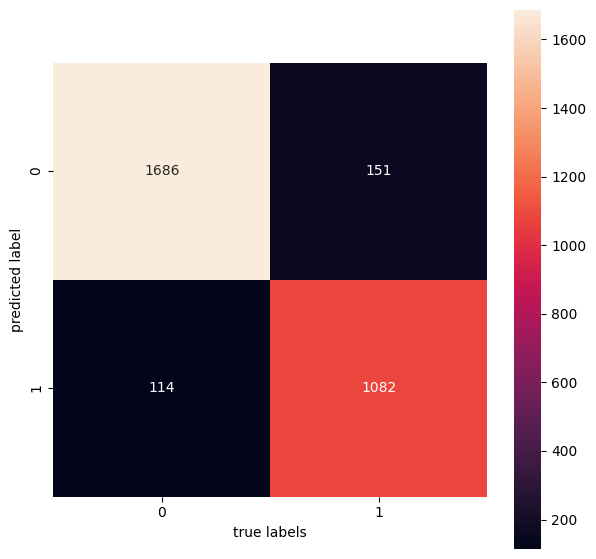

The accuracy is 0.9126277612924497
The matthews_corrcoef is 0.8183316088761357
The f1_score is 0.912406736337636


In [81]:
# plot the confusion matrix
mat = confusion_matrix(y_pt_br_to_split, y_pt_br_pred)

plt.figure(figsize=(7, 7))
sns.heatmap(mat.T, square=True, annot=True, fmt="d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_pt_br_to_split, y_pt_br_pred)))
print("The matthews_corrcoef is {}".format(matthews_corrcoef(y_pt_br_to_split, y_pt_br_pred)))
print("The f1_score is {}".format(f1_score(y_pt_br_to_split, y_pt_br_pred, average='weighted')))

## Dividing in Train, validation and test for en complete dataset

In [46]:
y_en = dataset_completo_en.loc[:,"label"]
X_en = dataset_completo_en.loc[:,"question"]

In [47]:
X_en_train, X_en_to_split, y_en_train, y_en_to_split = train_test_split(X_en, y_en, test_size=0.2, random_state=7, stratify=y_en)

In [48]:
X_en_validation, X_en_test, y_en_validation, y_en_test = train_test_split(X_en_to_split, y_en_to_split, test_size=0.5, random_state=7, stratify=y_en_to_split)

In [49]:
y_en_train

5577     0
1753     1
6516     0
9406     0
165      1
        ..
10792    0
1905     1
9441     0
7958     0
5645     0
Name: label, Length: 9060, dtype: int64

In [50]:
y_en_validation

7438     0
11078    0
626      1
8711     0
160      1
        ..
10788    0
499      1
4312     1
10177    0
4057     1
Name: label, Length: 1132, dtype: int64

In [51]:
y_en_test

4628     0
3088     1
2075     1
10852    0
10457    0
        ..
10618    0
6512     0
8116     0
6820     0
6308     0
Name: label, Length: 1133, dtype: int64

In [52]:
y_en_to_split

9460     0
9483     0
6862     0
7950     0
5462     0
        ..
1576     1
10789    0
6204     0
8106     0
9660     0
Name: label, Length: 2265, dtype: int64

In [83]:
# Build the model
model_en = make_pipeline(TfidfVectorizer(), MultinomialNB())# Train the model using the training data
model_en.fit(X_en_train, y_en_train)# Predict the categories of the test data

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [84]:
y_en_pred = model_en.predict(X_en_to_split)

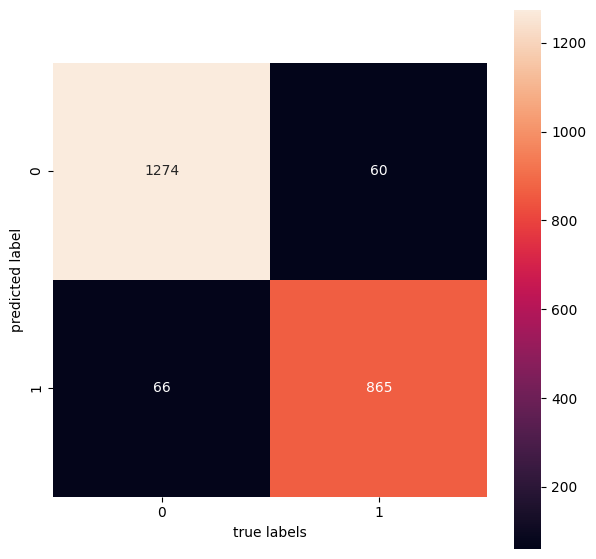

The accuracy is 0.9443708609271523
The matthews_corrcoef is 0.8850057562575242
The f1_score is 0.9443983675658096


In [85]:
# plot the confusion matrix
mat = confusion_matrix(y_en_to_split, y_en_pred)

plt.figure(figsize=(7, 7))
sns.heatmap(mat.T, square=True, annot=True, fmt="d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_en_to_split, y_en_pred)))
print("The matthews_corrcoef is {}".format(matthews_corrcoef(y_en_to_split, y_en_pred)))
print("The f1_score is {}".format(f1_score(y_en_to_split, y_en_pred, average='weighted')))